# Model Project

### In the following model project, we will solve the Solow model for a small open economy. Going from a closed economy to an open economy entails opening up to free capital flows from abroad, which in effect means that savings are no longer, as in the closed economy, equal to investments. We will extend the model to include a risk parameter, epsilon, to acocunt for country risk.

#### First, we import the packages we will need to set up and solve our model. 

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
from scipy import linalg
from scipy import optimize
import sympy as sm

# local module for linear algebra
%load_ext autoreload
%autoreload 2
#import numecon_linalg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### We will use pretty print so that our functions are readable when we output results

In [107]:
sm.init_printing(use_unicode=True) 

## Setting up the model

We consider the **Solow-model for the small open economy** where*:

1. $V_t$ is national wealth
2. $L_t$ is the labor force, which grows according to $L_{t+1} = (1 + n)L_t$, $L_0$ given
3. $K_t$ is capital

**National Wealth** is given as the sum of GDP and the return to net foreign assets

$$ V_t = K_t + F_t $$

and accumulates according to 

$$ V_{t+1} - V_t = S_t $$

**Savings** is a constant fraction of national income

$$ S_t = sYn_t  $$

such that **national wealth accumulates** according to

$$ V_{t+1} = \frac{1}{1+n}(v_t + sy_t^n) $$

The **production function** is assumed to be Cobb-Douglas with **constant-return to scale** 

$$ Y_t = BK_t^{\alpha}L_t^{1-\alpha} $$

such that the **transition equation** is

$$ V_{t+1} = \frac{1 + s\bar{r}}{1+n}V_t + \frac{sw^*}{1+n} $$


(*) Source: "Introducing Advanced Macroeconomics - Growth and Business Cycles" 2nd edition, Peter Birch Sørensen and Hans Jørgen Whitta-Jacobsen, 2010, McGraw-Hill Higher Education

#### We define the symbols:

##### We define the per capita variables of GDP, capital, national income, national wealth and foreign net assets, savings, world interest rate, TFP, labor, wages and population growth and a country risk parameter that we will use in the extension of the model.

In [215]:
# National wealth in period t and period t+1
Vt = sm.symbols('V_t')
Vt_1 = sm.symbols('V_t+1')
vt = sm.symbols('v_t')
vt_1 = sm.symbols('v_t+1')

# Net Foreign Assets
Ft = sm.symbols('F_t')
Ft_1 = sm.symbols('F_t+1')
ft = sm.symbols('f_t')

# Savings
St = sm.symbols('S_t')
s = sm.symbols('s')

# Capital stock in period t
Kt = sm.symbols('K_t')
Kt_1 = sm.symbols('K_t+1')
kt = sm.symbols('k_t')

# National income
Ytn = sm.symbols('Y_t_n')
ytn = sm.symbols('y_t_n')

# Gross domestic product
Yt = sm.symbols('Y_t_n')
yt = sm.symbols('y_t')

# The world real interest rate
r = sm.symbols('r_bar')
epsilon = sm.symbols('epsilon')

# Productivity/Technology
B = sm.symbols('B')

# Labor
Lt = sm.symbols('L_t')
Lt_1 = sm.symbols('L_t+1')

# alpha - return to capital
alpha = sm.symbols('alpha')

# Wages
wt = sm.symbols('w_t')

# Population growth
n = sm.symbols('n')

# Country risk parameter, epsilon

e = sm.symbols('epsilon')



##### We define national income as GDP plus returns on foreign net assets (at the world interest rate) because we have free capital flow in the model

In [109]:
Ytn = Yt + r*Ft
Ytn

In [105]:
# vt = kt + ft
# vt

##### Consequently, savings will be defined as national income at the current savings rate

In [110]:
St = s*Ytn
St

##### A Cobb-Douglas production function will be determining how aggregate output is produced

In [111]:
Yt = B*Kt**alpha*Lt**(1-alpha)
Yt

##### Labor input grows from period to the next in accordance with population growth, n.

In [112]:
Lt_1 = (1+n)*Lt
Lt_1

### Marginal product of capital


##### We first define output per capita, yt.

In [113]:
yt = sm.Eq(B*kt**(alpha))
yt

##### Differentiate wrt. kt 

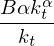

In [114]:
dydk = sm.diff(B*kt**(alpha), kt)
# dydk = sm.diff(yt, kt)
dydk

The MPK is therefore

In [115]:
MPK=B*(alpha)*kt**((alpha)-1)
MPK

##### Let's define a Marginal Product of Capital function where we can input an alpha and B of our choice.

In [116]:
def marginal_product_capital(alpha=0.3, B=1):
    yt = B*kt**(alpha)
    dydk = sm.diff(yt,kt)
    #MPK = sm.solve((yt, 0), kt)
    #MPK = sm.solve(yt, kt)[0]
    return dydk
    

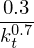

In [117]:
marginal_product_capital()  

##### In each period, the marginal product of capital will adjust to equal the world interest rate r. 
##### We define this interest rate as a function of parameters below.

In [118]:
def world_interest_rate(alpha, B, kt):
    r = alpha*B*kt**(alpha-1)  ##This should be the result of our differentiating above!
    return r

In [119]:
world_interest_rate(0.3, 1, 0.1)

## Solving the model

##### We are all set and can solve our model in a few simple steps. We'll start by finding the steady state of wealth, vt, and call it v*. 

In [120]:
r_bar = sm.Eq(alpha*B*kt**(alpha-1)-r,0)
    #OR
#r = alpha*B*kt**(alpha-1)

#### Define the transition equation 

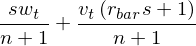

In [121]:
vt_1 = (1+s*r)/(1+n)*vt + (s*wt)/(1+n)
vt_1

#### Find steady state in the open economy, v*

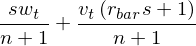

In [122]:
steadystate = (1+s*r)/(1+n)*vt + (s*wt)/(1+n)
steadystate

#### Solve for vt

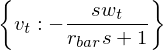

In [123]:
v_star = sm.solve((steadystate, 0), vt)
v_star

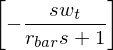

In [125]:
v_star = sm.solve(steadystate, vt)
v_star

In [126]:
def find_v_star(s, r, n, wt, kt, alpha, B):

    r_bar = alpha*B*kt**(alpha-1)  ##This should be the result of our differentiating above!
    
    w_star = (1-alpha)*B**(1/(1-alpha))*(alpha/r)**(alpha/(1-alpha))
    
    steadystate = (1+s*r_bar)/(1+n)*vt + (s*w_star)/(1+n)
    v_star = sm.solve((steadystate, 0), vt)
    return v_star


In [127]:
find_v_star(0.2, 0.03, 0.01, 1, 0.6, 0.33, 0.3)

#### Finding the steady state numerically using scipy

In [128]:
# s = 0.2
# r = 0.03
# n = 0.01
# wt = 1
# alpha = 0.33
# B = 0.3

In [229]:
# f = lambda kt: kt**alpha
# obj_vstar = lambda v_star: v_star - (1 + s*r_bar)/(1+n)*f + (s*w_star)/(1+n)
# result = optimize.root_scalar(obj_vstar, bracket=[0.1,100],method='brentq')

#### Visualizing the Solow Model for the small open economy

##### We define the equilibirum wage and the world interest rate



In [227]:
w_star = (1-alpha)*B**(1/(1-alpha))*(alpha/r)**(alpha/(1-alpha))
    
r_bar = alpha*B*kt**(alpha-1) 

##### We graph the convergence to steady state in a standard transistion diagram

In [156]:
## Defining our model for the transistion diagram

def plot_transition(s,r_bar,n,w_star,vt,v_star,t):

    ## Create the 45-degree line along which wealth accumulation is constant, i.e. v_t+1 = v_t

    fortyfive = [0] # container for storage
    
    for i in range(1,t):
        const_wealth = v_star
        fortyfive.append(const_wealth)
    
    ## Create the transistion equation
    
    transition = [vt] # container for transistion equation
    
    for i in range(1,t):
        trans = (1 + s*r_bar)/(1+n)*vt + (s*w_star)/(1+n)
        transition.append(trans)
    
    ## Plotting the transistion diagram
    plt.figure(figsize=(10,10))
    plt.plot(transition[:t],label='transition eq.')
    plt.plot(fortyfive[:t],label='v_t+1 = v_t')
    
    plt.xlim(0,t) #x-axis
    plt.ylim(0,fortyfive[-1])
    plt.xlabel('$v_t$')
    plt.ylabel('$v_{t+1}$')
    
    plt.grid(True)
    plt.legend()
    
    return plt.show()


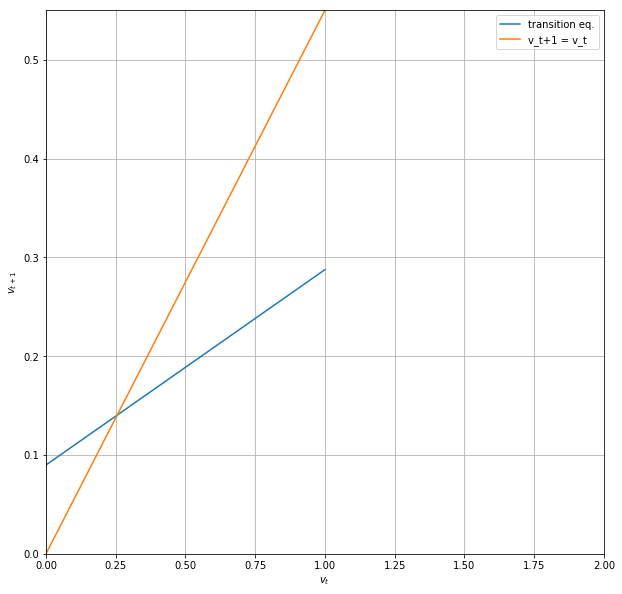

In [205]:
plot_transition(0.2, 0.03, 0.01, 1, 0.09, 0.55, 2)

#### Model extension: introducing country risk

In [76]:
def v_star_risk(s, r, n, wt, kt, alpha, B, epsilon):

    r_bar = alpha*B*kt**(alpha-1) + epsilon  ##This should be the result of our differentiating above!
    
    w_star = (1-alpha)*B**(1/(1-alpha))*(alpha/r)**(alpha/(1-alpha))
    
    steadystate = (1+s*r_bar)/(1+n)*vt + (s*w_star)/(1+n)
    v_star = sm.solve((steadystate, 0), vt)
    return v_star


In [93]:
v_star_risk(1,0.03,0.2,0.5, 0.1, 0.33, 0.1, 2)

#### Define different values for the risk parameter to explore how the steady state changes
#### (numerical optimization)

In [83]:
# risk_parameters = [-0.5, 0.01, 0.1, 0.25, 0.5, 0.9]

In [225]:
# for risk in risk_parameters:
    
# f = lambda v: (alpha*B*kt**(alpha-1) + epsilon)
# obj_v_star_risk = lambda v_star_risk: v_star_risk-((1+s*r)/(1+n)*v_star_risk + (s*wt)/(1+n))
# result = optimize.root_scalar(obj_v_star_risk, bracket=[0.1,100], method='brentq')
# print(f'for risk = {risk:.3f} the steady state for k is', result.root)

#### Define the world interest rate with country risk, epsilon


In [220]:
epsilon = e


In [222]:
## Defining our model for the transistion diagram

def plot_transition_risk(s,r_bar,epsilon,n,w_star,vt,v_star,t):

    ## Create the 45-degree line along which wealth accumulation is constant, i.e. v_t+1 = v_t

    fortyfive = [0] # container for storage
    
    for i in range(1,t):
        const_wealth = v_star
        fortyfive.append(const_wealth)
    
    ## Create the transistion equation
    
    transition = [vt] # container for transistion equation
    
    for i in range(1,t):
        trans = (1 + s*(r_bar+epsilon))/(1+n)*vt + (s*w_star)/(1+n)
        transition.append(trans)
    
    ## Plotting the transistion diagram
    plt.figure(figsize=(10,10))
    plt.plot(transition[:t],label='transition eq.')
    plt.plot(fortyfive[:t],label='v_t+1 = v_t')
    
    plt.xlim(0,t) #x-axis
    plt.ylim(0,fortyfive[-1])
    plt.xlabel('$v_t$')
    plt.ylabel('$v_{t+1}$')
    
    plt.grid(True)
    plt.legend()
    
    return plt.show()


#### The plot below shows the difference in convergence to the steady state of national wealth when including a 
#### parameter for country risk. We have not included uncertainty in the model, thus, higher country risk results
#### in higher national wealth. In reality a higher potential return resulting from higher country risk 
#### should come with a greater possibillity of negative return and/or loss.  

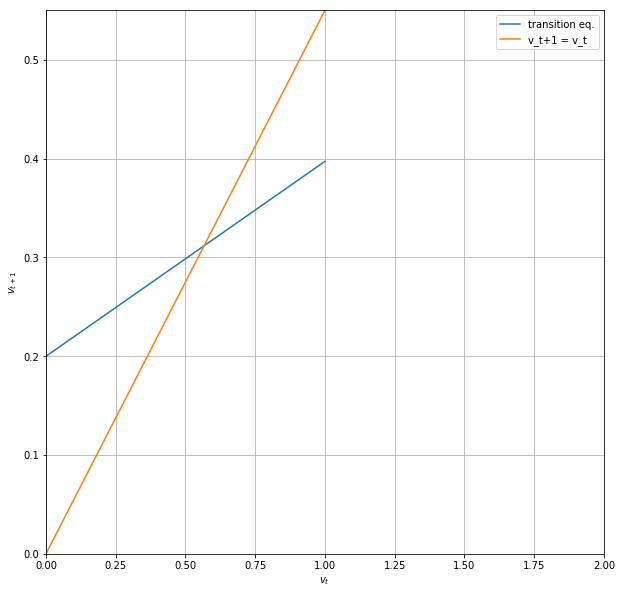

In [223]:
plot_transition_risk(0.2, 0.03, 0.05, 0.01, 0.99, 0.2, 0.55, 2)